<a href="https://colab.research.google.com/github/BHwi/Machine_Learning/blob/main/CH03/03_1_K_Neighbors_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**K-최근접 이웃 회귀**

*   K-최근접 알고리즘으로 학습된 머신으로 어떠한 input 데이터 값에 해당하는 데이터를 예측하는 알고리즘
*   예) 농어의 길이와 무게를 학습한 머신으로 농어의 길이를 통해 무게를 예측.

**회귀란**

*   두 변수 사이의 상관관계를 분석하는 방법

---
**농어 데이터 학습**

In [3]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

**산점도 출력**

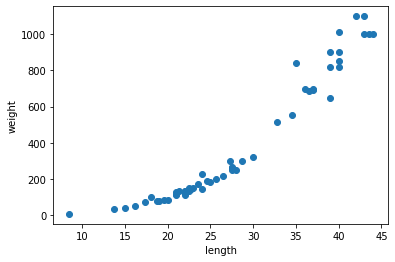

In [4]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---
**머신러닝을 위해 훈련세트와 테스트세트 분할(책과 동일한 결과를 얻기 위해 random_state의 값은 42로 설정**

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

**사이킷런에서 사용할 훈련 세트는 2차원 배열이어야 하므로 넘파이를 이용하여 억지로 2차원 배열로 재설정(reshape 함수 이용)**

In [11]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print("train set\n", train_input,'\n\ntest set\n', test_input)

train set
 [[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] 

test set
 [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


---
**K 최근접 이웃 회귀 알고리즘을 구현한 클래스는 'KNeighborRegressor' 라는 클래스로 KNeighborsClassifier과 사용법이 비슷하다**

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.9928094061010639


**결정계수(R^2)**

*   위에서 구한 score의 값은 다음과 같은 식으로 계산된다.
*   R^2 = 1 - ((타깃 - 예측)^2 / (타깃 - 평균)^2)
*   이 식은 타깃이 예측에 가까워지면 R^2이 1에 가까워진다는 뜻이며, 타깃이 평균에 가까워지면 R^2이 0에 가까워진다는 의미
*   따라서 예측이 잘 되었다면 결정계수는 1에 가까워지며, 예측이 미흡할 경우 결정계수는 0에 가까워진다.


---

**오차 계산하기**

In [15]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


**→ 평균적으로 19g 오차가 있음**

---
**과대적합, 과소적합**

*   훈련세트의 score를 출력


In [16]:
print(knr.score(train_input, train_target))

0.9698823289099255


**→ 테스트 세트보다 훈련세트의 score가 점수가 더 낮은 것을 확인**

*   훈련세트 점수는 좋지만 테스트세트의 점수는 굉장히 나쁜 경우 : 훈련세트에 **과대적합한다고 말함.**

    (훈련세트에만 적합)

*   테스트세트가 훈련세트의 점수보다 높거나, 모두 너무 낮은 경우 : 훈련세트에 **과소적합한다고 말함.**

    (모델이 너무 단순하여 적절히 훈련이 되지 않은 경우)

---
**과대(소)적합 해결**

*   과소적합일 경우 모델을 조금 더 복잡하게 만들고, 과대적합일 경우 모델을 조금 더 단순하게 만든다.
*   K 최근접 이웃 알고리즘에서 복잡하게 만드는 방법은 이웃의 개수 K를 줄이는 방법이 있음.

    (반대로 단순하게 만드는 방법은 이웃의 개수 K를 늘리는 방법이 있음.)

    → 이웃의 개수를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 일반적인 패턴에 따른다.



In [17]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [18]:
print(knr.score(test_input, test_target))

0.974645996398761


**훈련세트의 점수가 테스트 세트의 점수보다 높으므로 과소적합 문제 해결**